In [3]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.datasets import make_moons

from location_allocation import MaximizeCoverageCapacitated
import utils

### Generate Dummy Data & Optimize

In [4]:
points, _ = make_moons(300, noise=0.15)
facilities = utils.generate_candidate_facilities(points, 50)
capacities = utils.generate_facility_capacities(facilities.shape[0])

cost_matrix = distance_matrix(points, facilities)

mcclp = MaximizeCoverageCapacitated(
    points,
    facilities,
    cost_matrix,
    cost_cutoff=0.2,
    capacities=capacities,
    facilities_to_site=5,
)
mcclp.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 284 (-14849) rows, 556 (-14794) columns and 1282 (-59168) elements
Clp1000I sum of infeasibilities 0.0063794 - average 2.24627e-05, 377 fixed columns
Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp0000I Optimal - objective value 193
Clp0000I Optimal - objective value 193
Clp0000I Optimal - objective value 193
Coin0511I After Postsolve, objective 193, infeasibilities - dual 0 (0), primal 0.006993 (7)
Coin0512I Presolved model was optimal, full model needs cleaning up
Clp0000I Optimal - objective value 193
Clp0032I Optimal objective 193 - 0 iterations time 0.022, Presolve 0.01, Idiot 0.01

Starting MIP optimization


### Plot Result

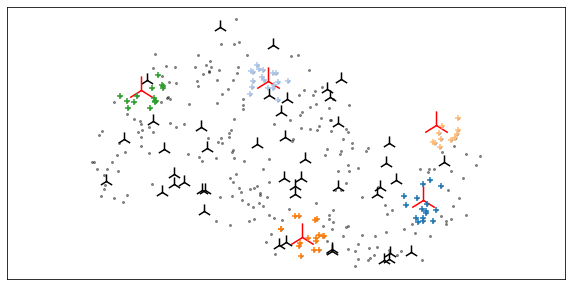

In [5]:
opt_facilities_indices = list(mcclp.result.solution.keys())
opt_facilities = facilities[opt_facilities_indices]
other_facilities = np.delete(facilities, [opt_facilities_indices], axis=0)

utils.plot_result(points, mcclp.result.solution, opt_facilities, other_facilities)